# Smooth FIR
Smooth FIR model (see [Goutte et al., 2000](https://ieeexplore.ieee.org/document/897811)).

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Smooth FIR is like Tikhonov regression with a following multivariate normal prior on the parameters:

\begin{equation}
\Sigma_{ij} = \nu \exp(- \frac{h}{2} (i - j) ^ 2)
\end{equation}

The smoothness parameters, $h$, is often set as:

\begin{equation}
h = \frac{1}{\sqrt(\frac{7}{\mathrm{sp}})}
\end{equation}

where $\mathrm{sp}$ is the sampling period (TR in fMRI lingo).

In code:

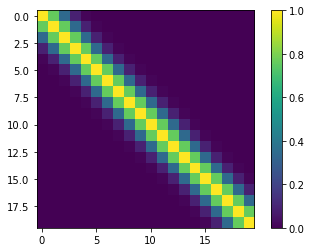

In [2]:
sp = 2  # sampling period
h = (1 / np.sqrt(7 / sp))  # smoothness factor
λ = 1   # regularization strength
p = 20   # number of parameters

sigma = np.zeros((p, p))
for i in range(p):
    for j in range(p):
        sigma[i, j] = np.exp(- (h / 2) * (i - j) ** 2)
        
plt.imshow(sigma)
plt.colorbar()

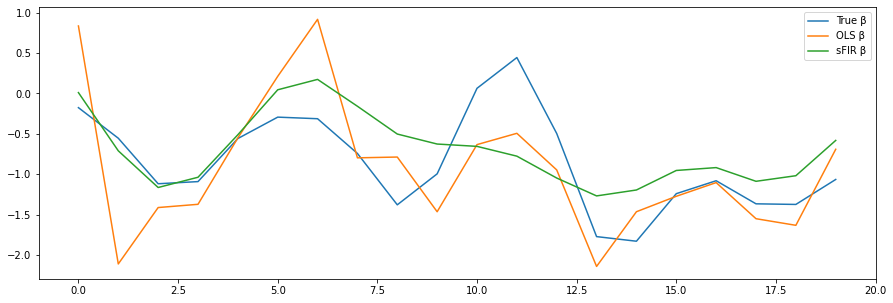

In [3]:
n = 100
X = np.random.normal(0, 1, size=(n, p))
b = np.random.multivariate_normal(np.zeros(p), cov=sigma)
y = X @ b + np.random.normal(0, 7, n)
b_ols = np.linalg.inv(X.T @ X) @ X.T @ y

λ = 100
b_sf = np.linalg.inv(X.T @ X + λ * np.linalg.inv(sigma)) @ X.T @ y

plt.figure(figsize=(15, 5))
plt.plot(b)
plt.plot(b_ols)
plt.plot(b_sf)
plt.xlim(-1, p)
plt.legend(['True β', 'OLS β', 'sFIR β']);